In [ ]:
################---nvidia-Nemo-----------------------------

In [2]:
!pip install nemo_toolkit['all']

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 11.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.7/15.7 MB 62.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.4/116.4 kB 17.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.5/97.5 kB 13.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.6/97.6 kB 14.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.2/91.2 kB 14.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.9/40.9 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 74.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.5/154.5 kB 22.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.5/79.5 kB 12.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 725.0/725.0 kB 60.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 805.2/805.2 kB 67.1 M

In [ ]:
import nemo.collections.asr as nemo_asr
asr_model = nemo_asr.models.EncDecCTCModelBPE.from_pretrained("nvidia/stt_en_conformer_ctc_small")


stt_en_conformer_ctc_small.nemo:   0%|          | 0.00/49.1M [00:00<?, ?B/s]

[NeMo I 2023-11-24 13:22:32 mixins:170] Tokenizer SentencePieceTokenizer initialized with 1024 tokens


[NeMo W 2023-11-24 13:22:32 modelPT:161] If you intend to do training or fine-tuning, please call the ModelPT.setup_training_data() method and provide a valid configuration file to setup the train data loader.
    Train config : 
    manifest_filepath: /data/NeMo_ASR_SET/English/v2.0/train/tarred_audio_manifest.json
    sample_rate: 16000
    batch_size: 64
    shuffle: true
    num_workers: 8
    pin_memory: true
    use_start_end_token: false
    trim_silence: false
    max_duration: 20.0
    min_duration: 0.1
    shuffle_n: 2048
    is_tarred: true
    tarred_audio_filepaths: /data/NeMo_ASR_SET/English/v2.0/train/audio__OP_0..4095_CL_.tar
    
[NeMo W 2023-11-24 13:22:32 modelPT:168] If you intend to do validation, please call the ModelPT.setup_validation_data() or ModelPT.setup_multiple_validation_data() method and provide a valid configuration file to setup the validation data loader(s). 
    Validation config : 
    manifest_filepath:
    - /data/ASR/LibriSpeech/librispeech_withs

[NeMo I 2023-11-24 13:22:32 features:289] PADDING: 0
[NeMo I 2023-11-24 13:22:34 save_restore_connector:249] Model EncDecCTCModelBPE was successfully restored from /root/.cache/huggingface/hub/models--nvidia--stt_en_conformer_ctc_small/snapshots/f879b51de584983383de815ce87d25469b2abbf3/stt_en_conformer_ctc_small.nemo.


In [ ]:
!wget https://dldata-public.s3.us-east-2.amazonaws.com/2086-149220-0033.wav


--2023-11-24 13:22:51--  https://dldata-public.s3.us-east-2.amazonaws.com/2086-149220-0033.wav
Resolving dldata-public.s3.us-east-2.amazonaws.com (dldata-public.s3.us-east-2.amazonaws.com)... 52.219.84.56, 3.5.131.184, 3.5.130.187, ...
Connecting to dldata-public.s3.us-east-2.amazonaws.com (dldata-public.s3.us-east-2.amazonaws.com)|52.219.84.56|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 237964 (232K) [audio/wav]
Saving to: ‘2086-149220-0033.wav’

2086-149220-0033.wa 100%[===================>] 232.39K  --.-KB/s    in 0.1s    

2023-11-24 13:22:52 (2.16 MB/s) - ‘2086-149220-0033.wav’ saved [237964/237964]



In [5]:
asr_model.transcribe(['2086-149220-0033.wav'])
#asr_model.transcribe(['/content/Text to speech British accent.mp3'])


Transcribing:   0%|          | 0/1 [00:00<?, ?it/s]

["well i don't wish to see it any more observed phoebe turning away her eyes it is certainly very like the old portrait"]

In [ ]:
#---or------

### Transcribing using Python
MODEL_NAME = "stt_en_conformer_ctc_small"

import nemo.collections.asr as nemo_asr
asr_model = nemo_asr.models.ASRModel.from_pretrained(MODEL_NAME)

!wget https://dldata-public.s3.us-east-2.amazonaws.com/2086-149220-0033.wav

asr_model.transcribe(['2086-149220-0033.wav'])

In [ ]:
####################-Open-ai ---WHISPE MODEL

In [ ]:
## Install dependencies
!pip install wget
!apt-get install sox libsndfile1 ffmpeg
!pip install text-unidecode
!pip install matplotlib>=3.3.2

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
libsndfile1 is already the newest version (1.0.31-2ubuntu0.1).
ffmpeg is already the newest version (7:4.4.2-0ubuntu0.22.04.1).
The following additional packages will be installed:
  libopencore-amrnb0 libopencore-amrwb0 libsox-fmt-alsa libsox-fmt-base libsox3 libwavpack1
Suggested packages:
  libsox-fmt-all
The following NEW packages will be installed:
  libopencore-amrnb0 libopencore-amrwb0 libsox-fmt-alsa libsox-fmt-base libsox3 libwavpack1 sox
0 upgraded, 7 newly installed, 0 to remove and 10 not upgraded.
Need to get 617 kB of archives.
After this operation, 1,764 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 libopencore-amrnb0 amd64 0.1.5-1 [94.8 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 libopencore-amrwb0 amd64 0.1.5-1 [49.1 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy-updates/universe amd64 libsox3 amd

In [ ]:
data_dir = "/content/audio_data"
output_dir = "/content/audio_data/wav_files"  # Change this to your desired output directory

import glob
import os
import subprocess
import tarfile
import wget

# Create the output directory if it doesn't exist
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Download the dataset. This will take a few moments...
print("******")
if not os.path.exists(data_dir + '/an4_sphere.tar.gz'):
    an4_url = 'https://dldata-public.s3.us-east-2.amazonaws.com/an4_sphere.tar.gz'
    an4_path = wget.download(an4_url, data_dir)
    print(f"Dataset downloaded at: {an4_path}")
else:
    print("Tarfile already exists.")
    an4_path = data_dir + '/an4_sphere.tar.gz'

if not os.path.exists(data_dir + '/an4/'):
    # Untar and convert .sph to .wav (using sox)
    tar = tarfile.open(an4_path)
    tar.extractall(path=data_dir)

    print("Converting .sph to .wav...")
    sph_list = glob.glob(data_dir + '/an4/**/*.sph', recursive=True)
    for sph_path in sph_list:
        # Create the output directory structure in wav_files
        relative_path = os.path.relpath(sph_path, data_dir)
        output_wav_path = os.path.join(output_dir, os.path.splitext(relative_path)[0] + '.wav')

        # Ensure the output directory exists
        os.makedirs(os.path.dirname(output_wav_path), exist_ok=True)

        cmd = ["sox", sph_path, output_wav_path]
        subprocess.run(cmd)
print("Finished conversion.\n******")


******
Dataset downloaded at: /content/audio_data/an4_sphere.tar.gz
Converting .sph to .wav...
Finished conversion.
******


In [ ]:
!rm -rf "/content/audio_data"
!mkdir "/content/audio_data"

In [ ]:
#########-open-ai--whisper model---open source---------------
#https://towardsdatascience.com/speech-to-text-with-openais-whisper-53d5cea9005e

In [ ]:
!pip install git+https://github.com/openai/whisper.git -q
import whisper

In [ ]:
model = whisper.load_model("large")

In [ ]:
text = model.transcribe("/content/audio_data/wav_files/an4/wav/an4_clstk/fmjc/an118-fmjc-b.wav")
#printing the transcribe
text['text']

In [ ]:
#------Custom train nvidia nemo--------------------------------------------------------------------------------------------------------------------------------------------

#https://github.com/NVIDIA/NeMo/blob/main/tutorials/asr/ASR_with_NeMo.ipynb

In [1]:
!pip install wget
!apt-get install sox libsndfile1 ffmpeg
!pip install text-unidecode
!pip install matplotlib>=3.3.2

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
libsndfile1 is already the newest version (1.0.31-2ubuntu0.1).
ffmpeg is already the newest version (7:4.4.2-0ubuntu0.22.04.1).
sox is already the newest version (14.4.2+git20190427-2+deb11u2ubuntu0.22.04.1).
0 upgraded, 0 newly installed, 0 to remove and 10 not upgraded.


In [2]:
import os
# This is where the an4/ directory will be placed.
# Change this if you don't want the data to be extracted in the current directory.
data_dir = "/content/NvidiaNemo"

if not os.path.exists(data_dir):
  os.makedirs(data_dir)

In [3]:
import glob
import os
import subprocess
import tarfile
import wget

# Download the dataset. This will take a few moments...
print("******")
if not os.path.exists(data_dir + '/an4_sphere.tar.gz'):
    an4_url = 'https://dldata-public.s3.us-east-2.amazonaws.com/an4_sphere.tar.gz'
    an4_path = wget.download(an4_url, data_dir)
    print(f"Dataset downloaded at: {an4_path}")
else:
    print("Tarfile already exists.")
    an4_path = data_dir + '/an4_sphere.tar.gz'

if not os.path.exists(data_dir + '/an4/'):
    # Untar and convert .sph to .wav (using sox)
    tar = tarfile.open(an4_path)
    tar.extractall(path=data_dir)

    print("Converting .sph to .wav...")
    sph_list = glob.glob(data_dir + '/an4/**/*.sph', recursive=True)
    for sph_path in sph_list:
        wav_path = sph_path[:-4] + '.wav'
        cmd = ["sox", sph_path, wav_path]
        subprocess.run(cmd)
print("Finished conversion.\n******")

******
Dataset downloaded at: /content/NvidiaNemo/an4_sphere.tar.gz
Converting .sph to .wav...
Finished conversion.
******


In [4]:
import librosa
import IPython.display as ipd

# Load and listen to the audio file
example_file = data_dir + '/an4/wav/an4_clstk/mgah/cen2-mgah-b.wav'
audio, sample_rate = librosa.load(example_file)

ipd.Audio(example_file, rate=sample_rate)

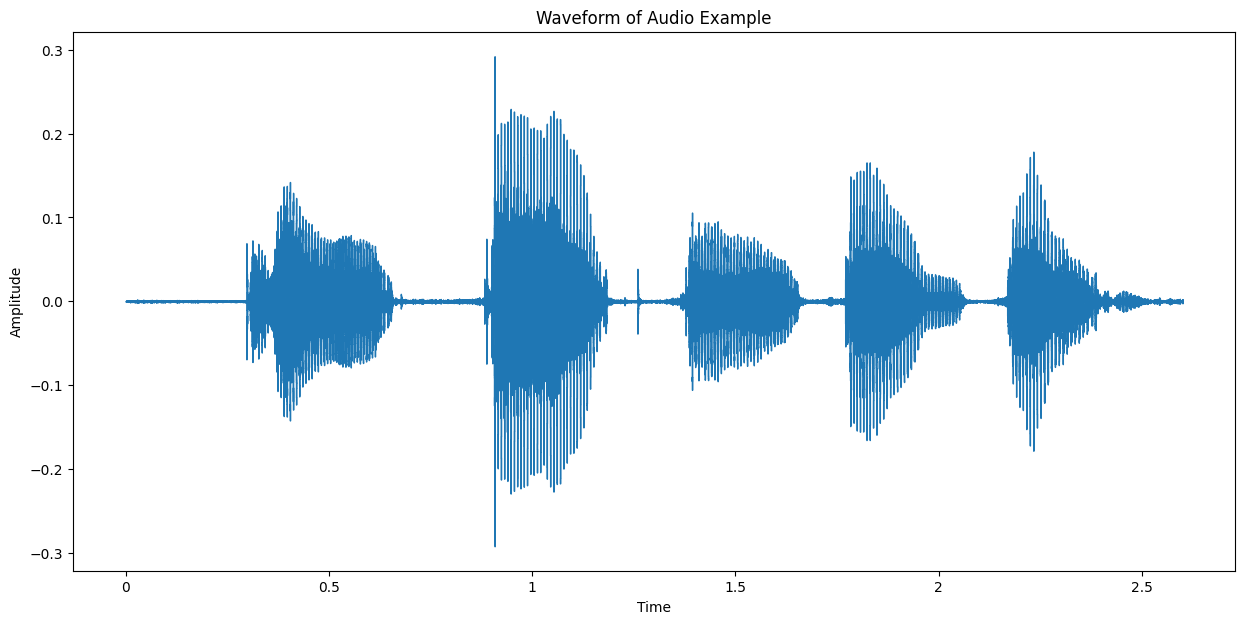

In [5]:
%matplotlib inline
import librosa.display
import matplotlib.pyplot as plt

# Plot our example audio file's waveform
plt.rcParams['figure.figsize'] = (15,7)
plt.title('Waveform of Audio Example')
plt.ylabel('Amplitude')

_ = librosa.display.waveshow(audio)

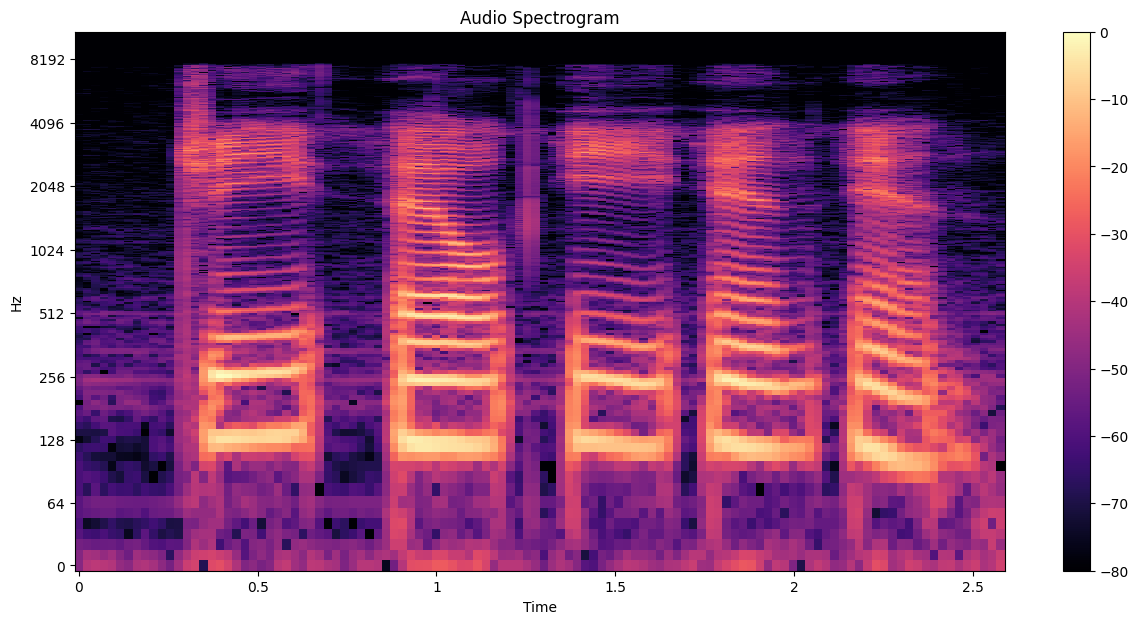

In [6]:
import numpy as np

# Get spectrogram using Librosa's Short-Time Fourier Transform (stft)
spec = np.abs(librosa.stft(audio))
spec_db = librosa.amplitude_to_db(spec, ref=np.max)  # Decibels

# Use log scale to view frequencies
librosa.display.specshow(spec_db, y_axis='log', x_axis='time')
plt.colorbar()
plt.title('Audio Spectrogram');

In [7]:

# NeMo's "core" package
import nemo
# NeMo's ASR collection - this collections contains complete ASR models and
# building blocks (modules) for ASR
import nemo.collections.asr as nemo_asr

In [8]:
# This line will download pre-trained QuartzNet15x5 model from NVIDIA's NGC cloud and instantiate it for you
quartznet = nemo_asr.models.EncDecCTCModel.from_pretrained(model_name="QuartzNet15x5Base-En")

[NeMo I 2023-11-27 11:00:38 cloud:58] Found existing object /root/.cache/torch/NeMo/NeMo_1.21.0/QuartzNet15x5Base-En/2b066be39e9294d7100fb176ec817722/QuartzNet15x5Base-En.nemo.
[NeMo I 2023-11-27 11:00:38 cloud:64] Re-using file from: /root/.cache/torch/NeMo/NeMo_1.21.0/QuartzNet15x5Base-En/2b066be39e9294d7100fb176ec817722/QuartzNet15x5Base-En.nemo
[NeMo I 2023-11-27 11:00:38 common:913] Instantiating model from pre-trained checkpoint
[NeMo I 2023-11-27 11:00:40 features:289] PADDING: 16
[NeMo I 2023-11-27 11:00:43 save_restore_connector:249] Model EncDecCTCModel was successfully restored from /root/.cache/torch/NeMo/NeMo_1.21.0/QuartzNet15x5Base-En/2b066be39e9294d7100fb176ec817722/QuartzNet15x5Base-En.nemo.


In [9]:

#Next, we'll simply add paths to files we want to transcribe into the list and pass it to our model. Note that it will work for relatively short (<25 seconds) files.

files = [os.path.join(data_dir, 'an4/wav/an4_clstk/mgah/cen2-mgah-b.wav')]
for fname, transcription in zip(files, quartznet.transcribe(paths2audio_files=files)):
  print(f"Audio in {fname} was recognized as: {transcription}")

Transcribing:   0%|          | 0/1 [00:00<?, ?it/s]

Audio in /content/NvidiaNemo/an4/wav/an4_clstk/mgah/cen2-mgah-b.wav was recognized as: g l e n n


In [ ]:
'''
Training from Scratch
To train from scratch, you need to prepare your training data in the right format and specify your models architecture.

Creating Data Manifests
The first thing we need to do now is to create manifests for our training and evaluation data, which will contain the metadata of our audio files. NeMo data sets take in a standardized manifest format where each line corresponds to one sample of audio, such that the number of lines in a manifest is equal to the number of samples that are represented by that manifest. A line must contain the path to an audio file, the corresponding transcript (or path to a transcript file), and the duration of the audio sample.

Here's an example of what one line in a NeMo-compatible manifest might look like:

{"audio_filepath": "path/to/audio.wav", "duration": 3.45, "text": "this is a nemo tutorial"}
We can build our training and evaluation manifests using an4/etc/an4_train.transcription and an4/etc/an4_test.transcription, which have lines containing transcripts and their corresponding audio file IDs:

'''

In [10]:
# --- Building Manifest Files --- #
import json

# Function to build a manifest
def build_manifest(transcripts_path, manifest_path, wav_path):
    with open(transcripts_path, 'r') as fin:
        with open(manifest_path, 'w') as fout:
            for line in fin:
                # Lines look like this:
                # <s> transcript </s> (fileID)
                transcript = line[: line.find('(')-1].lower()
                transcript = transcript.replace('<s>', '').replace('</s>', '')
                transcript = transcript.strip()

                file_id = line[line.find('(')+1 : -2]  # e.g. "cen4-fash-b"
                audio_path = os.path.join(
                    data_dir, wav_path,
                    file_id[file_id.find('-')+1 : file_id.rfind('-')],
                    file_id + '.wav')

                duration = librosa.core.get_duration(filename=audio_path)

                # Write the metadata to the manifest
                metadata = {
                    "audio_filepath": audio_path,
                    "duration": duration,
                    "text": transcript
                }
                json.dump(metadata, fout)
                fout.write('\n')

# Building Manifests
print("******")
train_transcripts = data_dir + '/an4/etc/an4_train.transcription'
train_manifest = data_dir + '/an4/train_manifest.json'
if not os.path.isfile(train_manifest):
    build_manifest(train_transcripts, train_manifest, 'an4/wav/an4_clstk')
    print("Training manifest created.")

test_transcripts = data_dir + '/an4/etc/an4_test.transcription'
test_manifest = data_dir + '/an4/test_manifest.json'
if not os.path.isfile(test_manifest):
    build_manifest(test_transcripts, test_manifest, 'an4/wav/an4test_clstk')
    print("Test manifest created.")
print("***Done***")

******


[NeMo W 2023-11-27 11:00:44 nemo_logging:349] <ipython-input-10-74319cd51f80>:21: FutureWarning: get_duration() keyword argument 'filename' has been renamed to 'path' in version 0.10.0.
    	This alias will be removed in version 1.0.
      duration = librosa.core.get_duration(filename=audio_path)
    


Training manifest created.
Test manifest created.
***Done***


In [11]:
#Specifying Our Model with a YAML Config File
#For this tutorial, we'll build a Jasper_4x1 model, with K=4 blocks of single (R=1) sub-blocks and a greedy CTC decoder, using the configuration found in ./configs/config.yaml.

#If we open up this config file, we find model section which describes architecture of our model. A model contains an entry labeled encoder, with a field called jasper that contains a list with multiple

# --- Config Information ---#
try:
    from ruamel.yaml import YAML
except ModuleNotFoundError:
    from ruamel_yaml import YAML
config_path = './configs/config.yaml'

if not os.path.exists(config_path):
    # Grab the config we'll use in this example
    BRANCH = 'main'
    !mkdir configs
    !wget -P configs/ https://raw.githubusercontent.com/NVIDIA/NeMo/$BRANCH/examples/asr/conf/config.yaml

yaml = YAML(typ='safe')
with open(config_path) as f:
    params = yaml.load(f)
print(params)

--2023-11-27 11:01:57--  https://raw.githubusercontent.com/NVIDIA/NeMo/main/examples/asr/conf/config.yaml
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4280 (4.2K) [text/plain]
Saving to: ‘configs/config.yaml’

config.yaml         100%[===================>]   4.18K  --.-KB/s    in 0s      

2023-11-27 11:01:57 (54.6 MB/s) - ‘configs/config.yaml’ saved [4280/4280]

{'name': 'QuartzNet15x5', 'sample_rate': 16000, 'repeat': 1, 'dropout': 0.0, 'separable': True, 'labels': [' ', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', "'"], 'model': {'train_ds': {'manifest_filepath': '???', 'sample_rate': 16000, 'labels': [' ', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm

In [12]:
'''
Training with PyTorch Lightning
NeMo models and modules can be used in any PyTorch code where torch.nn.Module is expected.

However, NeMo's models are based on PytorchLightning's LightningModule and we recommend you use PytorchLightning for training and fine-tuning as it makes using mixed precision and distributed training very easy. So to start,
let's create Trainer instance for training on GPU for 50 epochs
'''
import pytorch_lightning as pl
trainer = pl.Trainer(devices=1, accelerator='gpu', max_epochs=250)

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


In [13]:
from omegaconf import DictConfig
params['model']['train_ds']['manifest_filepath'] = train_manifest
params['model']['validation_ds']['manifest_filepath'] = test_manifest
first_asr_model = nemo_asr.models.EncDecCTCModel(cfg=DictConfig(params['model']), trainer=trainer)

[NeMo I 2023-11-27 11:03:43 audio_to_text_dataset:45] Model level config does not contain `sample_rate`, please explicitly provide `sample_rate` to the dataloaders.
[NeMo I 2023-11-27 11:03:43 audio_to_text_dataset:45] Model level config does not contain `labels`, please explicitly provide `labels` to the dataloaders.
[NeMo I 2023-11-27 11:03:43 collections:196] Dataset loaded with 948 files totalling 0.71 hours
[NeMo I 2023-11-27 11:03:43 collections:197] 0 files were filtered totalling 0.00 hours


[NeMo W 2023-11-27 11:03:43 nemo_logging:349] /usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
      warnings.warn(_create_warning_msg(
    


[NeMo I 2023-11-27 11:03:43 audio_to_text_dataset:45] Model level config does not contain `sample_rate`, please explicitly provide `sample_rate` to the dataloaders.
[NeMo I 2023-11-27 11:03:43 audio_to_text_dataset:45] Model level config does not contain `labels`, please explicitly provide `labels` to the dataloaders.
[NeMo I 2023-11-27 11:03:43 collections:196] Dataset loaded with 130 files totalling 0.10 hours
[NeMo I 2023-11-27 11:03:43 collections:197] 0 files were filtered totalling 0.00 hours
[NeMo I 2023-11-27 11:03:43 features:289] PADDING: 16


In [14]:
# Start training!!!
trainer.fit(first_asr_model)

INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


[NeMo I 2023-11-27 11:03:45 modelPT:728] Optimizer config = Novograd (
    Parameter Group 0
        amsgrad: False
        betas: [0.8, 0.5]
        eps: 1e-08
        grad_averaging: False
        lr: 0.01
        weight_decay: 0.001
    )
[NeMo I 2023-11-27 11:03:45 lr_scheduler:910] Scheduler "<nemo.core.optim.lr_scheduler.CosineAnnealing object at 0x7b4266557b20>" 
    will be used during training (effective maximum steps = 7500) - 
    Parameters : 
    (warmup_steps: null
    warmup_ratio: null
    min_lr: 0.0
    last_epoch: -1
    max_steps: 7500
    )


INFO:pytorch_lightning.callbacks.model_summary:
  | Name              | Type                              | Params
------------------------------------------------------------------------
0 | preprocessor      | AudioToMelSpectrogramPreprocessor | 0     
1 | encoder           | ConvASREncoder                    | 1.2 M 
2 | decoder           | ConvASRDecoder                    | 29.7 K
3 | loss              | CTCLoss                           | 0     
4 | spec_augmentation | SpectrogramAugmentation           | 0     
5 | _wer              | WER                               | 0     
------------------------------------------------------------------------
1.2 M     Trainable params
0         Non-trainable params
1.2 M     Total params
4.836     Total estimated model params size (MB)


Sanity Checking: 0it [00:00, ?it/s]

[NeMo W 2023-11-27 11:03:50 nemo_logging:349] /usr/local/lib/python3.10/dist-packages/pytorch_lightning/loops/fit_loop.py:281: PossibleUserWarning: The number of training batches (30) is smaller than the logging interval Trainer(log_every_n_steps=50). Set a lower value for log_every_n_steps if you want to see logs for the training epoch.
      rank_zero_warn(
    


Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=250` reached.


In [38]:
#test with validation dataset---------
# Bigger batch-size = bigger throughput
params['model']['validation_ds']['batch_size'] = 16

# Setup the test data loader and make sure the model is on GPU
first_asr_model.setup_test_data(test_data_config=params['model']['validation_ds'])
first_asr_model.cuda()
first_asr_model.eval()

# We will be computing Word Error Rate (WER) metric between our hypothesis and predictions.
# WER is computed as numerator/denominator.
# We'll gather all the test batches' numerators and denominators.
wer_nums = []
wer_denoms = []

# Loop over all test batches.
# Iterating over the model's `test_dataloader` will give us:
# (audio_signal, audio_signal_length, transcript_tokens, transcript_length)
# See the AudioToCharDataset for more details.
for test_batch in first_asr_model.test_dataloader():
        test_batch = [x.cuda() for x in test_batch]
        targets = test_batch[2]
        targets_lengths = test_batch[3]
        log_probs, encoded_len, greedy_predictions = first_asr_model(
            input_signal=test_batch[0], input_signal_length=test_batch[1]
        )
        # Notice the model has a helper object to compute WER
        first_asr_model._wer.update(greedy_predictions, targets, targets_lengths)
        _, wer_num, wer_denom = first_asr_model._wer.compute()
        first_asr_model._wer.reset()
        wer_nums.append(wer_num.detach().cpu().numpy())
        wer_denoms.append(wer_denom.detach().cpu().numpy())

        # Release tensors from GPU memory
        del test_batch, log_probs, targets, targets_lengths, encoded_len, greedy_predictions

# We need to sum all numerators and denominators first. Then divide.
print(f"WER = {sum(wer_nums)/sum(wer_denoms)}")

[NeMo I 2023-11-27 13:43:30 audio_to_text_dataset:45] Model level config does not contain `sample_rate`, please explicitly provide `sample_rate` to the dataloaders.
[NeMo I 2023-11-27 13:43:30 audio_to_text_dataset:45] Model level config does not contain `labels`, please explicitly provide `labels` to the dataloaders.
[NeMo I 2023-11-27 13:43:30 collections:196] Dataset loaded with 130 files totalling 0.10 hours
[NeMo I 2023-11-27 13:43:30 collections:197] 0 files were filtered totalling 0.00 hours
WER = 0.33764553686934023


In [ ]:

#If you'd like to save this model checkpoint for loading later (e.g. for fine-tuning, or for continuing training), you can simply call first_asr_model.save_to(<checkpoint_path>).
## Then, to restore your weights, you can rebuild the model using the config (let's say you call it first_asr_model_continued this time) and call first_asr_model_continued.restore_from(<checkpoint_path>).

#After Training: Monitoring Progress and Changing Hyperparameters
#We can now start Tensorboard to see how training went. Recall that WER stands for Word Error Rate and so the lower it is, the better.

try:
  from google import colab
  COLAB_ENV = True
except (ImportError, ModuleNotFoundError):
  COLAB_ENV = False

# Load the TensorBoard notebook extension
if COLAB_ENV:
  %load_ext tensorboard
  %tensorboard --logdir lightning_logs/
else:
  print("To use tensorboard, please use this notebook in a Google Colab environment.")

In [18]:
#We could improve this model by playing with hyperparameters. We can look at the current hyperparameters with the following:

print(params['model']['optim'])

{'name': 'novograd', 'lr': 0.01, 'betas': [0.8, 0.5], 'weight_decay': 0.001, 'sched': {'name': 'CosineAnnealing', 'monitor': 'val_loss', 'reduce_on_plateau': False, 'warmup_steps': None, 'warmup_ratio': None, 'min_lr': 0.0, 'last_epoch': -1}}


In [ ]:
#Let's say we wanted to change the learning rate. To do so, we can create a new_opt dict and set our desired learning rate, then call <model>.setup_optimization() with the new optimization parameters.

import copy
new_opt = copy.deepcopy(params['model']['optim'])
new_opt['lr'] = 0.001
first_asr_model.setup_optimization(optim_config=DictConfig(new_opt))
# And then you can invoke trainer.fit(first_asr_model)

In [ ]:
'''
Inference
Let's have a quick look at how one could run inference with NeMo's ASR model.

First, EncDecCTCModel and its subclasses contain a handy transcribe method which can be used to simply obtain audio files' transcriptions. It also has batch_size argument to improve performance.
'''

In [19]:

paths2audio_files = [os.path.join(data_dir, 'an4/wav/an4_clstk/mgah/cen2-mgah-b.wav'),
                     os.path.join(data_dir, 'an4/wav/an4_clstk/fmjd/cen7-fmjd-b.wav'),
                     os.path.join(data_dir, 'an4/wav/an4_clstk/fmjd/cen8-fmjd-b.wav'),
                     os.path.join(data_dir, 'an4/wav/an4_clstk/fkai/cen8-fkai-b.wav')]
print(first_asr_model.transcribe(paths2audio_files=paths2audio_files,
                                 batch_size=4))

Transcribing:   0%|          | 0/1 [00:00<?, ?it/s]

['g l e n n', 'four two one oh one nine six', 'seven fourteen sixty one', 'october first nineteen sixty nine']


In [21]:
paths2audio_files = [os.path.join(data_dir, '/content/2086-149220-0033.wav')]
print(first_asr_model.transcribe(paths2audio_files=paths2audio_files, batch_size=4))

Transcribing:   0%|          | 0/1 [00:00<?, ?it/s]

['o tl sty ze  oo gi etw tnyi  ehnr niyst seven no  l orht']


In [39]:
#first_asr_model.save_to("/content/lightning_logs/version_0/checkpoints")

# Save the model checkpoint
# Save the model configuration
model_config_path = '/content/configs/config.yaml'
params['model']['train_ds']['manifest_filepath'] = train_manifest
params['model']['validation_ds']['manifest_filepath'] = test_manifest

with open(model_config_path, 'w') as f:
    yaml.dump(params['model'], f)

# Save the model checkpoint
#checkpoint_path = '/content/lightning_logs/version_0/checkpoints/nemo_asr_checkpoint.ckpt'
checkpoint_path = '/content/lightning_logs/version_1/checkpoints/nemo_asr_checkpoint_retrain.ckpt'

trainer.save_checkpoint(checkpoint_path)



In [40]:
import yaml

# Load the model configuration
with open(model_config_path, 'r') as f:
    model_config = yaml.safe_load(f)

# Create a new trainer for restoring the model
trainer_restore = pl.Trainer(devices=1, accelerator='gpu', max_epochs=250)

# Load the model from the checkpoint
restored_asr_model = nemo_asr.models.EncDecCTCModel(cfg=DictConfig(model_config), trainer=trainer_restore)
restored_asr_model = restored_asr_model.load_from_checkpoint(checkpoint_path)


INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


[NeMo I 2023-11-27 13:44:56 audio_to_text_dataset:45] Model level config does not contain `sample_rate`, please explicitly provide `sample_rate` to the dataloaders.
[NeMo I 2023-11-27 13:44:56 audio_to_text_dataset:45] Model level config does not contain `labels`, please explicitly provide `labels` to the dataloaders.
[NeMo I 2023-11-27 13:44:56 collections:196] Dataset loaded with 948 files totalling 0.71 hours
[NeMo I 2023-11-27 13:44:56 collections:197] 0 files were filtered totalling 0.00 hours
[NeMo I 2023-11-27 13:44:56 audio_to_text_dataset:45] Model level config does not contain `sample_rate`, please explicitly provide `sample_rate` to the dataloaders.
[NeMo I 2023-11-27 13:44:56 audio_to_text_dataset:45] Model level config does not contain `labels`, please explicitly provide `labels` to the dataloaders.
[NeMo I 2023-11-27 13:44:56 collections:196] Dataset loaded with 130 files totalling 0.10 hours
[NeMo I 2023-11-27 13:44:56 collections:197] 0 files were filtered totalling 0.0

[NeMo W 2023-11-27 13:44:57 modelPT:161] If you intend to do training or fine-tuning, please call the ModelPT.setup_training_data() method and provide a valid configuration file to setup the train data loader.
    Train config : 
    manifest_filepath: /content/NvidiaNemo/an4/train_manifest.json
    sample_rate: 16000
    labels:
    - ' '
    - a
    - b
    - c
    - d
    - e
    - f
    - g
    - h
    - i
    - j
    - k
    - l
    - m
    - 'n'
    - o
    - p
    - q
    - r
    - s
    - t
    - u
    - v
    - w
    - x
    - 'y'
    - z
    - ''''
    batch_size: 32
    trim_silence: true
    max_duration: 16.7
    shuffle: true
    num_workers: 8
    pin_memory: true
    is_tarred: false
    tarred_audio_filepaths: null
    shuffle_n: 2048
    bucketing_strategy: synced_randomized
    bucketing_batch_size: null
    
[NeMo W 2023-11-27 13:44:57 modelPT:168] If you intend to do validation, please call the ModelPT.setup_validation_data() or ModelPT.setup_multiple_validation_da

[NeMo I 2023-11-27 13:44:57 features:289] PADDING: 16


In [41]:

paths2audio_files = [os.path.join(data_dir, 'an4/wav/an4_clstk/mgah/cen2-mgah-b.wav'),
                     os.path.join(data_dir, 'an4/wav/an4_clstk/fmjd/cen7-fmjd-b.wav'),
                     os.path.join(data_dir, 'an4/wav/an4_clstk/fmjd/cen8-fmjd-b.wav'),
                     os.path.join(data_dir, 'an4/wav/an4_clstk/fkai/cen8-fkai-b.wav')]
print(restored_asr_model.transcribe(paths2audio_files=paths2audio_files,
                                 batch_size=4))

Transcribing:   0%|          | 0/1 [00:00<?, ?it/s]

['g l e n n', 'four two one oh one nine six', 'seven fourteen sixty one', 'october first nineteen sixty nine']


In [42]:
paths2audio_files = [os.path.join(data_dir, '/content/2086-149220-0033.wav')]
print(first_asr_model.transcribe(paths2audio_files=paths2audio_files, batch_size=4))

Transcribing:   0%|          | 0/1 [00:00<?, ?it/s]

['o tl sty ze  oo gi etw tnyi  ehnr niyst seven no  l orht']


In [ ]:
#Transfer learning

In [30]:
print(quartznet._cfg['spec_augment'])


{'_target_': 'nemo.collections.asr.modules.SpectrogramAugmentation', 'rect_freq': 50, 'rect_masks': 5, 'rect_time': 120}


In [32]:

# Check what kind of vocabulary/alphabet the model has right now
print(quartznet.decoder.vocabulary)
# Let's add "!" symbol there. Note that you can (and should!) change the vocabulary
# entirely when fine-tuning using a different language.
quartznet.change_vocabulary(
    new_vocabulary=[
        ' ', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n',
        'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', "'", "!"
    ]
)

[' ', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', "'"]
[NeMo I 2023-11-27 10:33:40 ctc_models:309] Changed decoder to output to [' ', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', "'", '!'] vocabulary.


In [36]:
import copy
new_opt = copy.deepcopy(params['model']['optim'])
new_opt['lr'] = 0.001
first_asr_model.setup_optimization(optim_config=DictConfig(new_opt))

[NeMo I 2023-11-27 12:58:30 modelPT:728] Optimizer config = Novograd (
    Parameter Group 0
        amsgrad: False
        betas: [0.8, 0.5]
        eps: 1e-08
        grad_averaging: False
        lr: 0.001
        weight_decay: 0.001
    )
[NeMo I 2023-11-27 12:58:30 lr_scheduler:910] Scheduler "<nemo.core.optim.lr_scheduler.CosineAnnealing object at 0x7b439972c280>" 
    will be used during training (effective maximum steps = 7500) - 
    Parameters : 
    (warmup_steps: null
    warmup_ratio: null
    min_lr: 0.0
    last_epoch: -1
    max_steps: 7500
    )


(Novograd (
 Parameter Group 0
     amsgrad: False
     betas: [0.8, 0.5]
     eps: 1e-08
     grad_averaging: False
     initial_lr: 0.001
     lr: 0.001
     weight_decay: 0.001
 ),
 {'scheduler': <nemo.core.optim.lr_scheduler.CosineAnnealing at 0x7b439972c280>,
  'interval': 'step',
  'frequency': 1,
  'monitor': 'val_loss',
  'reduce_on_plateau': False})

In [37]:
# Use the smaller learning rate we set before
quartznet.setup_optimization(optim_config=DictConfig(new_opt))

# Point to the data we'll use for fine-tuning as the training set
quartznet.setup_training_data(train_data_config=params['model']['train_ds'])

# Point to the new validation data for fine-tuning
quartznet.setup_validation_data(val_data_config=params['model']['validation_ds'])

# And now we can create a PyTorch Lightning trainer and call `fit` again.
trainer = pl.Trainer(devices=1, accelerator='gpu', max_epochs=50)
trainer.fit(quartznet)

[NeMo W 2023-11-27 12:58:43 modelPT:617] Trainer wasn't specified in model constructor. Make sure that you really wanted it.


[NeMo I 2023-11-27 12:58:43 modelPT:728] Optimizer config = Novograd (
    Parameter Group 0
        amsgrad: False
        betas: [0.8, 0.5]
        eps: 1e-08
        grad_averaging: False
        lr: 0.001
        weight_decay: 0.001
    )


[NeMo W 2023-11-27 12:58:43 lr_scheduler:890] Neither `max_steps` nor `iters_per_batch` were provided to `optim.sched`, cannot compute effective `max_steps` !
    Scheduler will not be instantiated !


[NeMo I 2023-11-27 12:58:43 audio_to_text_dataset:45] Model level config does not contain `sample_rate`, please explicitly provide `sample_rate` to the dataloaders.
[NeMo I 2023-11-27 12:58:43 audio_to_text_dataset:45] Model level config does not contain `labels`, please explicitly provide `labels` to the dataloaders.
[NeMo I 2023-11-27 12:58:43 collections:196] Dataset loaded with 948 files totalling 0.71 hours
[NeMo I 2023-11-27 12:58:43 collections:197] 0 files were filtered totalling 0.00 hours
[NeMo I 2023-11-27 12:58:43 audio_to_text_dataset:45] Model level config does not contain `sample_rate`, please explicitly provide `sample_rate` to the dataloaders.
[NeMo I 2023-11-27 12:58:43 audio_to_text_dataset:45] Model level config does not contain `labels`, please explicitly provide `labels` to the dataloaders.
[NeMo I 2023-11-27 12:58:43 collections:196] Dataset loaded with 130 files totalling 0.10 hours
[NeMo I 2023-11-27 12:58:43 collections:197] 0 files were filtered totalling 0.0

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


[NeMo I 2023-11-27 12:58:43 modelPT:728] Optimizer config = Novograd (
    Parameter Group 0
        amsgrad: False
        betas: [0.8, 0.5]
        eps: 1e-08
        grad_averaging: False
        lr: 0.001
        weight_decay: 0.001
    )
[NeMo I 2023-11-27 12:58:43 lr_scheduler:910] Scheduler "<nemo.core.optim.lr_scheduler.CosineAnnealing object at 0x7b4398bd1db0>" 
    will be used during training (effective maximum steps = 1500) - 
    Parameters : 
    (warmup_steps: null
    warmup_ratio: null
    min_lr: 0.0
    last_epoch: -1
    max_steps: 1500
    )


INFO:pytorch_lightning.callbacks.model_summary:
  | Name              | Type                              | Params
------------------------------------------------------------------------
0 | preprocessor      | AudioToMelSpectrogramPreprocessor | 0     
1 | encoder           | ConvASREncoder                    | 18.9 M
2 | decoder           | ConvASRDecoder                    | 29.7 K
3 | loss              | CTCLoss                           | 0     
4 | spec_augmentation | SpectrogramAugmentation           | 0     
5 | _wer              | WER                               | 0     
------------------------------------------------------------------------
18.9 M    Trainable params
0         Non-trainable params
18.9 M    Total params
75.698    Total estimated model params size (MB)


Sanity Checking: 0it [00:00, ?it/s]

[NeMo W 2023-11-27 12:58:50 nemo_logging:349] /usr/local/lib/python3.10/dist-packages/pytorch_lightning/loops/fit_loop.py:281: PossibleUserWarning: The number of training batches (30) is smaller than the logging interval Trainer(log_every_n_steps=50). Set a lower value for log_every_n_steps if you want to see logs for the training epoch.
      rank_zero_warn(
    


Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=50` reached.


In [ ]:
#####---speechbrain--------------------------------------------------
#https://huggingface.co/speechbrain
#https://github.com/speechbrain/speechbrain/tree/develop/recipes/CommonVoice/ASR

In [1]:
!pip install speechbrain

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 630.6/630.6 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 52.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.4/116.4 kB 10.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 526.7/526.7 kB 35.3 MB/s eta 0:00:00


In [3]:
from speechbrain.pretrained import EncoderDecoderASR
asr_model =EncoderDecoderASR.from_hparams(source="speechbrain/asr-crdnn-rnnlm-librispeech",
savedir="pretrained_models/asr-crdnn-rnnlm-librispeech")
asr_model.transcribe_file('speechbrain/asr-crdnn-rnnlm-librispeech/example.wav')

hyperparams.yaml:   0%|          | 0.00/4.49k [00:00<?, ?B/s]

normalizer.ckpt:   0%|          | 0.00/1.41k [00:00<?, ?B/s]

asr.ckpt:   0%|          | 0.00/480M [00:00<?, ?B/s]

lm.ckpt:   0%|          | 0.00/212M [00:00<?, ?B/s]

tokenizer.ckpt:   0%|          | 0.00/253k [00:00<?, ?B/s]

example.wav:   0%|          | 0.00/104k [00:00<?, ?B/s]

'THE BIRCH CANOE SLID ON THE SMOOTH PLANKS'

In [6]:
!wget https://dldata-public.s3.us-east-2.amazonaws.com/2086-149220-0033.wav
asr_model.transcribe_file('/content/2086-149220-0033.wav')

--2023-11-27 15:15:50--  https://dldata-public.s3.us-east-2.amazonaws.com/2086-149220-0033.wav
Resolving dldata-public.s3.us-east-2.amazonaws.com (dldata-public.s3.us-east-2.amazonaws.com)... 52.219.106.242, 3.5.130.153, 52.219.103.74, ...
Connecting to dldata-public.s3.us-east-2.amazonaws.com (dldata-public.s3.us-east-2.amazonaws.com)|52.219.106.242|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 237964 (232K) [audio/wav]
Saving to: ‘2086-149220-0033.wav.1’

2086-149220-0033.wa 100%[===================>] 232.39K  --.-KB/s    in 0.04s   

2023-11-27 15:15:50 (5.09 MB/s) - ‘2086-149220-0033.wav.1’ saved [237964/237964]



"WELL I DON'T WISH TO SEE IT ANY MORE OBSERVED PHOEBE TURNING AWAY HER EYES IT IS CERTAINLY VERY LIKE THE OLD PORTRAIT"

In [16]:
!git clone https://github.com/speechbrain/speechbrain


Cloning into 'speechbrain'...
remote: Enumerating objects: 85734, done.
remote: Counting objects: 100% (1881/1881), done.
remote: Compressing objects: 100% (940/940), done.
remote: Total 85734 (delta 1079), reused 1427 (delta 846), pack-reused 83853
Receiving objects: 100% (85734/85734), 86.73 MiB | 16.70 MiB/s, done.
Resolving deltas: 100% (57843/57843), done.
Updating files: 100% (1192/1192), done.


In [ ]:
#############--facebook wav2vec2-----------------------------------------------------------
#https://huggingface.co/facebook/wav2vec2-large-960h-lv60-self

In [10]:
 #!pip install datasets
 from transformers import Wav2Vec2Processor, Wav2Vec2ForCTC
 from datasets import load_dataset
 import torch

 # load model and processor
 processor = Wav2Vec2Processor.from_pretrained("facebook/wav2vec2-large-960h-lv60-self")
 model = Wav2Vec2ForCTC.from_pretrained("facebook/wav2vec2-large-960h-lv60-self")

 # load dummy dataset and read soundfiles
 ds = load_dataset("patrickvonplaten/librispeech_asr_dummy", "clean", split="validation")

 # tokenize
 input_values = processor(ds[0]["audio"]["array"], return_tensors="pt", padding="longest").input_values

 # retrieve logits
 logits = model(input_values).logits

 # take argmax and decode
 predicted_ids = torch.argmax(logits, dim=-1)
 transcription = processor.batch_decode(predicted_ids)


preprocessor_config.json:   0%|          | 0.00/158 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/162 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.61k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/291 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/85.0 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.26G [00:00<?, ?B/s]

Some weights of the model checkpoint at facebook/wav2vec2-large-960h-lv60-self were not used when initializing Wav2Vec2ForCTC: ['wav2vec2.encoder.pos_conv_embed.conv.weight_v', 'wav2vec2.encoder.pos_conv_embed.conv.weight_g']
- This IS expected if you are initializing Wav2Vec2ForCTC from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing Wav2Vec2ForCTC from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of Wav2Vec2ForCTC were not initialized from the model checkpoint at facebook/wav2vec2-large-960h-lv60-self and are newly initialized: ['wav2vec2.encoder.pos_conv_embed.conv.parametrizations.weight.original0', 'wav2vec2.masked_spec_embed', 'wav2vec2.encoder.pos_conv_embed.conv.parametrizations.weig

Extracting data files:   0%|          | 0/1 [00:00<?, ?it/s]

Generating validation split: 0 examples [00:00, ? examples/s]

It is strongly recommended to pass the ``sampling_rate`` argument to this function. Failing to do so can result in silent errors that might be hard to debug.


In [15]:

# Load a single .wav file
# Import necessary libraries
from transformers import Wav2Vec2Processor, Wav2Vec2ForCTC
import torch, torchaudio

wav_file_path = "/content/2086-149220-0033.wav"
audio_input, _ = torchaudio.load(wav_file_path, normalize=True)

# Tokenize
input_values = processor(audio_input.squeeze().numpy(), return_tensors="pt", padding="longest").input_values

# Retrieve logits
logits = model(input_values).logits

# Take argmax and decode
predicted_ids = torch.argmax(logits, dim=-1)
transcription = processor.batch_decode(predicted_ids)

# Print the transcription
print("Transcription:", transcription[0])


It is strongly recommended to pass the ``sampling_rate`` argument to this function. Failing to do so can result in silent errors that might be hard to debug.


Transcription: WELL I DON'T WISH TO SEE IT ANY MORE OBSERVED PHOEBE TURNING AWAY HER EYES IT IS CERTAINLY VERY LIKE THE OLD PORTRAIT
